In [6]:
import pandas as pd
import numpy as np

data_source = 'wine.data'
d = pd.read_table(data_source, delimiter=',', 
                  header=None,
                  names=['class','alcohol','malicacid',
                         'ash','alcanity_of_ash','magnesium',
                         'total_phenols','flavanoids','noflavanoid_phenols',
                         'proanthocyanins','color_intensity',
                         'hue','proline'])
d.head()

,class,alcohol,malicacid,ash,alcanity_of_ash,magnesium,total_phenols,flavanoids,noflavanoid_phenols,proanthocyanins,color_intensity,hue,proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


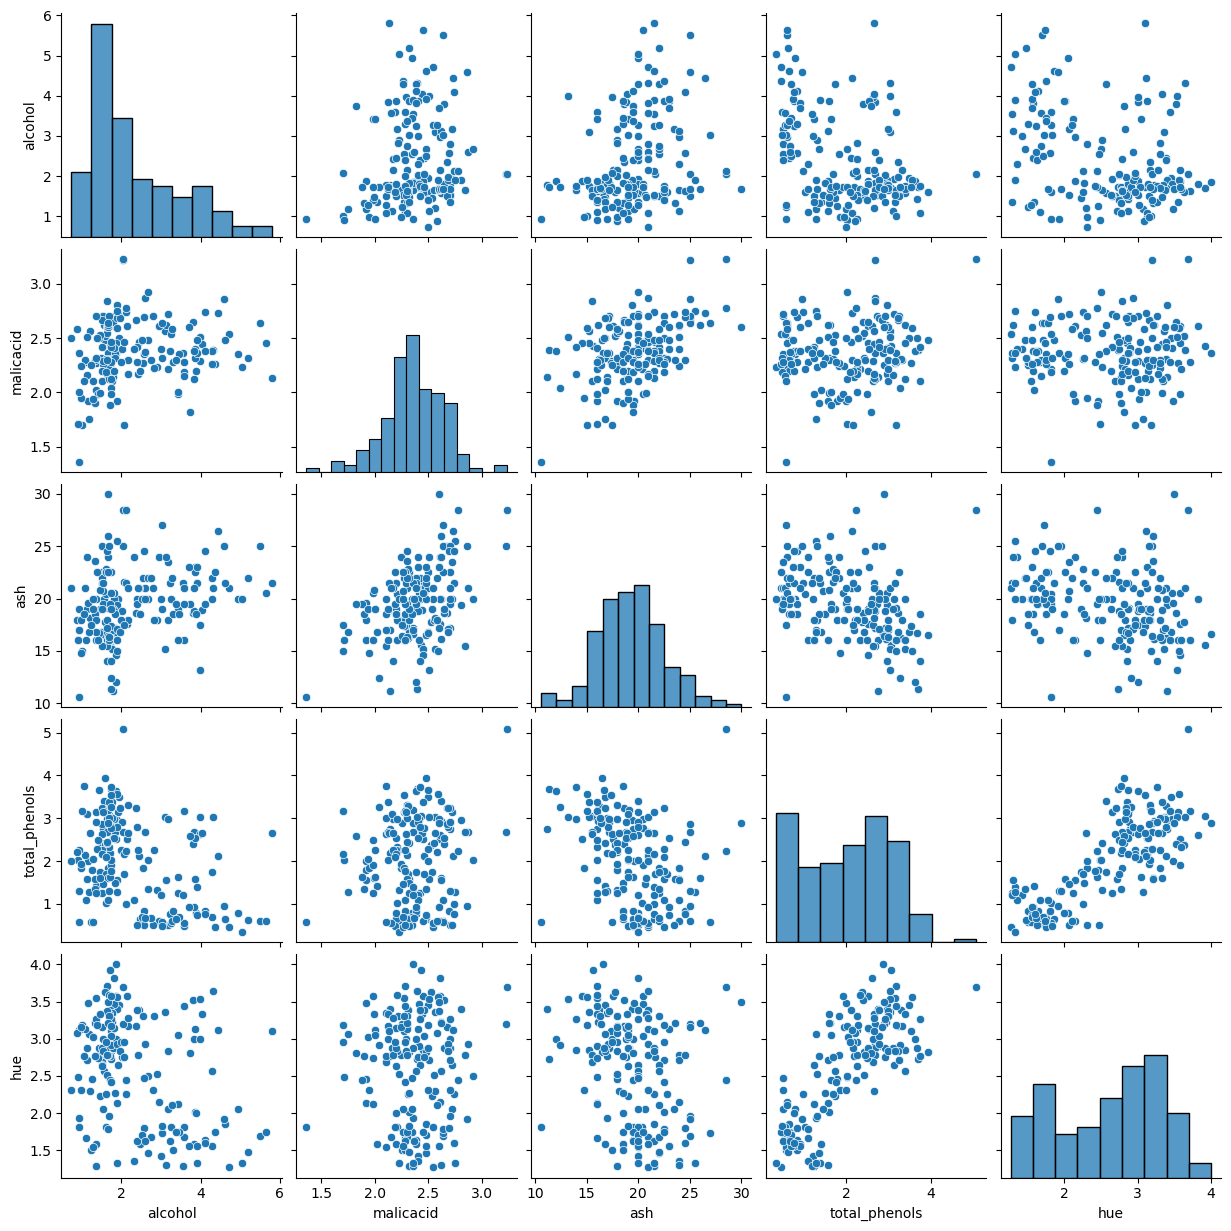

In [7]:
import seaborn as sb
%matplotlib inline
cols = ['alcohol','malicacid','ash','total_phenols','hue']
sb.pairplot(d[cols])

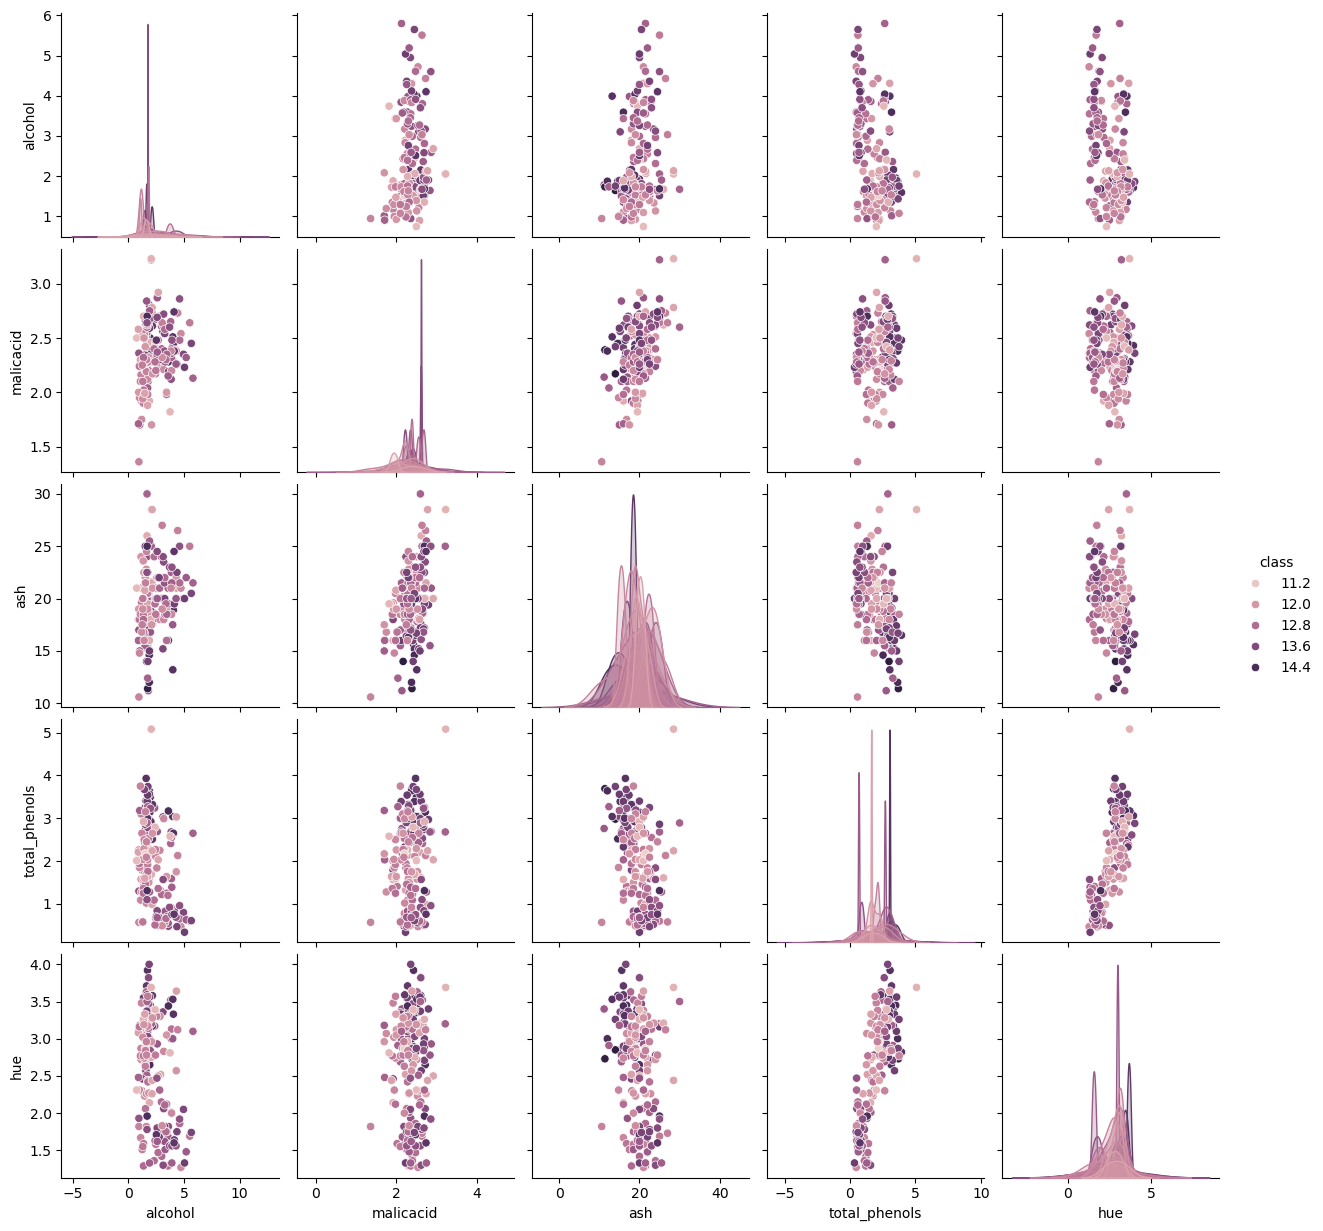

In [8]:
import seaborn as sb

cols = ['alcohol','malicacid','ash','total_phenols','hue']

sb.pairplot(
    d,
    vars=cols,
    hue='class'
)

In [14]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

x_train = d[['alcohol','malicacid','ash','total_phenols','hue']]
y_train = d['class'].astype(int)

K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train)

X_test = pd.DataFrame([[13.5, 1.8, 2.4, 2.8, 1.05]], columns=['alcohol','malicacid','ash','total_phenols','hue'])
target = knn.predict(X_test)

print(target)

[14]


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train, x_holdout, y_train, y_holdout = train_test_split(
    d[['alcohol','malicacid','ash','total_phenols','hue']],
    d['class'].astype(int),  
    test_size=0.3,
    random_state=17
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_holdout)
accur = accuracy_score(y_holdout, knn_pred)

print("accuracy:", accur)

accuracy: 0.42592592592592593


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []
K = 3

y_labels = d['class'].astype(int)

knn = KNeighborsClassifier(n_neighbors=K)
scores = cross_val_score(knn, d.iloc[:, 0:4], y_labels, cv=10, scoring='accuracy')
cv_scores.append(scores.mean())

MSE = [1-x for x in cv_scores]

print("Средняя точность:", cv_scores[0])
print("MSE:", MSE[0])

Средняя точность: 0.6568627450980392
MSE: 0.3431372549019608


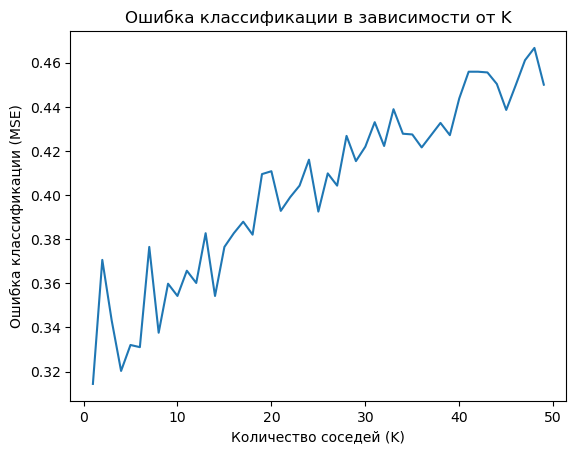

In [30]:
k_list = range(1, 50)
MSE = []

for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[:, 0:4], d['class'].astype(int), cv=10, scoring='accuracy')
    MSE.append(1 - scores.mean())
    
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)')
plt.ylabel('Ошибка классификации (MSE)')
plt.title('Ошибка классификации в зависимости от K')
plt.show()